# Classic methods

## IMDB Dataset

In [ ]:
from fastai.text.all import *

In [ ]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

(#2) [Path('/home/renato/.fastai/data/imdb_sample/texts.csv'),Path('/home/renato/.fastai/data/imdb_sample/models')]

In [ ]:
df = pd.read_csv(path/'texts.csv')
df.sample(3)

label  \
306  positive   
185  positive   
49   negative   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        text  \
306  'Five Days' is billed as something special, a crime drama that consists of a series of episodes, each set on one particular day of a police enquiry. But in fact, this element of the story turns out to be rather less significant than might at first be thought, as the fact that the action in each episode is confined to 24 hours is hardly noticeable, and very little distinguishes the program from countless other crime stories. In fact one almost can't help drawing comparisons to the last 'Prime Suspect', as one of the sub-plots focuses on a single, cynical female cop approaching retirement: a...   
185  Being from a small town in Illinois myself, I can instantly relate to this movie. Considering the era it was made in, the townsfolk look uncomfortably like a lot of people I grew up with. Yes the plot is so-so. And yes, the Acting is not going to get nominated for an Oscar anytime soon. But that isn't the point. The point is to suspend reality and just have FUN. And this movie has Fun aplenty. From the greedy,uncaring banker to the well meaning,but dimwitted deputy, this movie was made to poke fun at the SciFi genre and small town living at it's best. Who can't smile at the sight of the En...   
49   I remember I saw this cartoon when I was 6 or 7. My grandfather picked up the video of it for free at the mall. I remember that it really sucked. The plot had no sense. I hated the fox that became Casper's friend. He was so stupid! Casper cried his head off if he couldn't find a friend. So what? Get over it! The only good part and I don't want to sound mean-spirited was when the fox got shot and died at the end. I laughed my head off in payback because this cartoon sucked so much. The bad news is the fox resurrects and becomes a ghost. I wish he had stayed dead. I think I even gave the vid...   

     is_valid  
306     False  
185     False  
49      False

In [ ]:
df.is_valid.value_counts()

is_valid
False    800
True     200
Name: count, dtype: int64

In [ ]:
(df
 .groupby('is_valid', as_index=False)
 .label.value_counts()
 .assign(perc=lambda d: d['count']/d.groupby('is_valid')['count'].transform('sum'))
)

is_valid     label  count     perc
0     False  negative    417  0.52125
1     False  positive    383  0.47875
2      True  negative    107  0.53500
3      True  positive     93  0.46500

## Preprocess data

### Split train/validation

In [ ]:
x_train = df.loc[~df.is_valid, 'text'].values
y_train = df.loc[~df.is_valid, 'label'].values
x_train.shape, y_train.shape

((800,), (800,))

In [ ]:
x_valid = df.loc[df.is_valid, 'text'].values
y_valid = df.loc[df.is_valid, 'label'].values
x_valid.shape, y_valid.shape

((200,), (200,))

In [ ]:
for i in np.random.choice(len(x_train), 3):
    print(f'[{i:3}]: {y_train[i]}')
    print(x_train[i])
    print('-'*80)

[472]: negative
Apparently there's a very good reason why I never heard about "Dr. Hackenstein" before me and a couple of mates accidentally stumbled upon it and stupidly decided to give it a chance. That reason is: it sucks! It's a very pointless, dull, imbecilic and totally unmemorable horror comedy/parody. Actually, to be honest, I'm not even sure if this was meant as a comedy because sometimes the script takes itself quite seriously and tries really hard to be a really ambitious and original late 80's horror effort. In the year 1909, at the dawn of a new era in medical science according to the opening sequences, Dr. Elliot Hackenstein needs exactly three women  no more, no less  to refurbish his beloved wife whom he accidentally killed. She's only just a living head left now, but the stupid body snatchers only provide male cadavers. So when Dr. Hackenstein yells out "I need three female bodies to bring back my wife", his words aren't even cold and there just miraculously appear t

### Vectorize

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df.text.head(5))
x

<5x490 sparse matrix of type '<class 'numpy.float64'>'
	with 664 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.get_feature_names_out()

array(['about', 'across', 'acting', 'actors', 'actress', 'actually',
       'admiration', 'against', 'all', 'almost', 'along', 'already',
       'also', 'american', 'an', 'and', 'are', 'around', 'as', 'at',
       'awful', 'banzai', 'barrage', 'baseness', 'be', 'because', 'been',
       'before', 'begin', 'being', 'believable', 'believe', 'best',
       'better', 'between', 'big', 'bio', 'bit', 'black', 'blame',
       'blathered', 'bleeping', 'border', 'both', 'br', 'brassed',
       'british', 'but', 'by', 'came', 'camera', 'can', 'cannot',
       'career', 'caring', 'carries', 'case', 'cast', 'certainly',
       'challenges', 'change', 'character', 'characteristics', 'cheap',
       'cheery', 'chill', 'choice', 'clever', 'coleman', 'come', 'comes',
       'comforting', 'compelled', 'concentrate', 'concept', 'continually',
       'cost', 'could', 'countries', 'country', 'cruelly', 'cruelty',
       'dad', 'days', 'deal', 'declaration', 'deep', 'determine',
       'develop', 'developm

In [ ]:
x[0].toarray()

array([[0.        , 0.        , 0.10775324, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.13355736, 0.        , 0.        , 0.07524389,
        0.        , 0.10775324, 0.        , 0.        , 0.        ,
        0.13355736, 0.13355736, 0.        , 0.        , 0.        ,
        0.13355736, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.13355736, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.10775324, 0.        ,
        0.        , 0.        , 0.        , 0.13355736, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.13355736, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, stop_words='english')
vectorizer

TfidfVectorizer(max_df=0.5, min_df=5, stop_words='english')

In [ ]:
x_train_vec = vectorizer.fit_transform(x_train)
x_train_vec

<800x2977 sparse matrix of type '<class 'numpy.float64'>'
	with 52516 stored elements in Compressed Sparse Row format>

In [ ]:
x_valid_vec = vectorizer.transform(x_valid)
x_valid_vec

<200x2977 sparse matrix of type '<class 'numpy.float64'>'
	with 13059 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.get_feature_names_out()

array(['000', '10', '100', ..., 'zombie', 'zombies', 'zone'], dtype=object)

In [ ]:
vectorizer.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

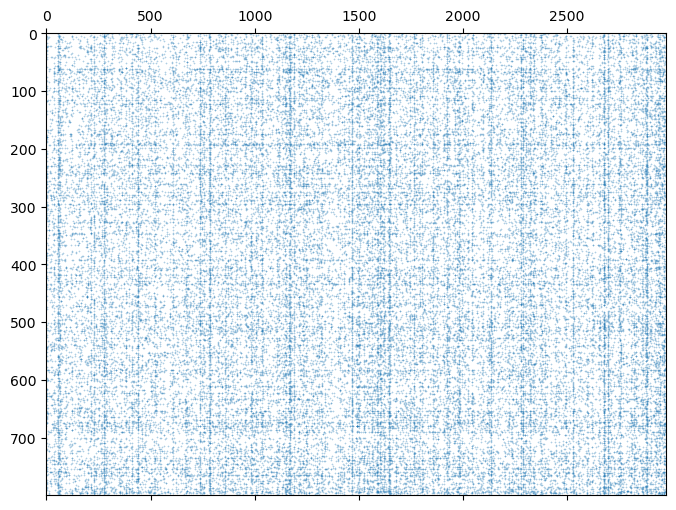

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
ax.spy(x_train_vec.toarray(), markersize=0.10, aspect='auto');

## Model

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(200, max_depth=7)
rf.fit(x_train_vec, y_train)

RandomForestClassifier(max_depth=7, n_estimators=200)

In [ ]:
rf_preds = rf.predict(x_valid_vec)

In [ ]:
rf_accuracy = (rf_preds==y_valid).mean()
rf_accuracy

0.81

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train_vec, y_train)

LogisticRegression()

In [ ]:
log_reg_preds = log_reg.predict(x_valid_vec)

In [ ]:
log_reg_accuracy = (log_reg_preds==y_valid).mean()
log_reg_accuracy

0.81

### Results

In [ ]:
df_results = pd.DataFrame({
    'text': x_valid,
    'label': y_valid,
    'rf_preds': rf_preds,
    'log_reg_preds': log_reg_preds,
})
df_results.sample(3)

text  \
167  Of the elements that make this the best at this point, I have to say #1 is Christine McIntire. Shemp's scene when poisoned and her reaction are truly magnificent. I imagine that, as one poster suggested, Christine was trying to hold back laughter during that scene, but it actually made her seem even more deliciously evil, to be smiling at Shemp's possibly dying.<br /><br />Another character who helps this stand out is the Goon. His look was a great cross between horrific and comedic goof-ball. Hardly a character I would choose to meet in a dark alley or, for that matter anywhere. I would h...   
36   I'm not sure under what circumstances director Visconti decided to film James Cain's novel "The Postman Always Rings Twice" (I'm not even sure if Viscounti acquired the book's rights), but the resulting movie is definitely interesting. It is not the best version of Cain's story (I like the 1981 version best), but thanks to Visconti's excellent direction and the casting of Clara Calamai and Massimo Girotti (a very sensual couple), it is a must for noir fans. Visconti mixes neorealism with noir sensibilities to great effect. The film is not perfect, though. My main complaint is that the film...   
184  Zu Warriors most definitely should've been an animated series because as a movie it's like watching an old anime on acid.The movie just starts out of nowhere and people just fly around fighting with metal wings and other stupid weapons until this princess sacrifices herself for her lover on a cloud or something.Whether this princess is a god or an angel is beyond me but soon enough this flying wind bad guy comes in and kills her while the guy with the razor wings fights some other mystical God /Demon/Wizard thing.The plot line is either not there or extremely hard to follow you need to be ...   

        label  rf_preds log_reg_preds  
167  positive  positive      positive  
36   positive  positive      positive  
184  negative  negative      negative

In [ ]:
(df_results
 .pipe(lambda d: {k:(d['label']==d[k]).mean() for k in d.columns[2:]})
)

{'rf_preds': 0.81, 'log_reg_preds': 0.81}

In [ ]:
(df_results
 .loc[lambda d: (d.label!=d.rf_preds)&(d.label!=d.log_reg_preds)]
 .sample(3)
)

text  \
89  This movie is one of the most wildly distorted portrayals of history. Horribly inaccurate, this movie does nothing to honor the hundreds of thousands of Dutch, British, Chinese, American and indigenous enslaved laborers that the sadistic Japanese killed and tortured to death. The bridge was to be built "over the bodies of the white man" as stated by the head Japanese engineer. It is disgusting that such unspeakable horrors committed by the Japanese captors is the source of a movie, where the bridge itself, isn't even close to accurate to the actual bridge. The actual bridge was built of st...   
13  Sure this was a remake of a 70's film, but it had the suspense and action of a current film, say Breakdown. He's running, desperate to be with his hospitalized wife, the police are the least concern. The chases were very good, the part with him being<br /><br />cornered at a rest stop was well done, the end of the movie was a great cliffhanger. This is better than Bullitt, a boring movie with what, a muscle car chase that was filmed badly? Vigo's character knew what he had to do to escape Johnny Law, few movies had the effects-night vision, CB radio-okay I forgot the name of the movie, guy...   
69  I saw this movie, just now, not when it was released and hailed as best picture of the year here in Israel. and to summarize everything right now, I will just say: this is not a good film.<br /><br />This is Dror Shaul's second feature film, and I have to admit that his first and the TV drama he made before this picture are much better. further more, this is his first attempt at directing a drama. the early works were comedies, and were funny and effective.<br /><br />The first thing you have to know if you'll ever see this film: Israel of the 21st century hates the kibbutz and the values ...   

       label  rf_preds log_reg_preds  
89  negative  positive      positive  
13  positive  negative      negative  
69  negative  positive      positive

## Bonus: NMF

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf = NMF(n_components=5)
nmf

NMF(n_components=5)

In [ ]:
x_train_nmf = nmf.fit_transform(x_train_vec, y_train)
x_train_nmf.shape

/home/renato/miniforge3/envs/nl/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(800, 5)

In [ ]:
nmf.components_.shape

(5, 2977)

In [ ]:
def top_words(row, topk=10):
    vocab = vectorizer.get_feature_names_out()
    return [vocab[o] for o in np.argsort(row)[-topk:][::-1]]

top_words(nmf.components_[0])

['just',
 'people',
 'horror',
 'films',
 'fun',
 'good',
 'really',
 'isn',
 'funny',
 'actually']

In [ ]:
for o in nmf.components_:
    print(top_words(o))

['just', 'people', 'horror', 'films', 'fun', 'good', 'really', 'isn', 'funny', 'actually']
['bad', 'acting', 'plot', 'worst', 'don', 'effects', 'seen', 've', 'terrible', 'make']
['really', 'story', 'good', 'just', 'great', 'didn', 'movies', 'action', 'watch', 'love']
['series', 'episode', 'episodes', 'war', 'tv', 'best', 'family', 'fan', 'english', 'parents']
['life', 'man', 'time', 'role', 'love', 'young', 'family', 'character', 'john', 'story']


![NMF](pics/nmf.png)
(source: [NMF Tutorial](http://perso.telecom-paristech.fr/~essid/teach/NMF_tutorial_ICME-2014.pdf))

## Bonus: stemming

In [ ]:
import nltk
nltk.download('wordnet')
from nltk import stem

[nltk_data] Downloading package wordnet to /home/renato/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
porter = stem.porter.PorterStemmer()
[porter.stem(word) for word in ['organize', 'organizes', 'organizing']]

['organ', 'organ', 'organ']

## Bonus: lemmatization

In [ ]:
wnl = stem.WordNetLemmatizer()
[wnl.lemmatize(word) for word in ['organize', 'organizes', 'organizing']]

['organize', 'organizes', 'organizing']